In [2]:
#deal with HTML tables



import requests
from bs4 import BeautifulSoup





In [8]:

url = 'https://en.wikipedia.org/w/index.php?title=List_of_Game_of_Thrones_episodes&oldid=802553687'
#url = 'http://faculty.baruch.cuny.edu/nkumar/pytest/page.htm'


#url_new = 'https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_episodes'
r = requests.get(url)

html_contents = r.text
html_soup = BeautifulSoup(html_contents) #create a beautiful soup objecttable1 = html_soup.find('table')

ep_tables = html_soup.find_all('table', class_='wikiepisodetable',limit=1)
#print(ep_tables)

table1 = html_soup.find('table')
print(table1)

<table class="wikitable plainrowheaders" style="text-align:center"><tbody><tr style="text-align:center"><th colspan="2" rowspan="2" scope="col" style="min-width:50px;padding:0 8px">Season</th><th colspan="2" rowspan="2" scope="col" style="padding:0 8px">Episodes</th><th colspan="2" scope="col">Originally aired</th></tr><tr><th scope="col">First aired</th><th scope="col">Last aired</th></tr><tr><td style="background:#295354;width:10px"></td><th colspan="1" scope="row" style="text-align:center"><a href="#Season_1_(2011)">1</a></th><td colspan="2">10</td><td colspan="1" style="padding:0.2em 0.4em">April 17, 2011<span style="display:none"> (<span class="bday dtstart published updated">2011-04-17</span>)</span></td><td style="padding:0 8px">June 19, 2011<span style="display:none"> (<span class="dtend">2011-06-19</span>)</span></td></tr><tr><td style="background:#D09916;width:10px"></td><th colspan="1" scope="row" style="text-align:center"><a href="#Season_2_(2012)">2</a></th><td colspan="2"

In [13]:
for table in ep_tables:
    headers = []
    rows = table.find_all('tr')
    for header in table.find('tr').find_all('th'):
        headers.append(header.text)
        
    #print(rows)
headers

['No.overall',
 'No. inseason',
 'Title',
 'Directed by',
 'Written by',
 'Original air date\u200a[20]',
 'U.S. viewers(millions)']

In [15]:
#<tr> tag defines a row in an HTML table
#<th> tag defines a header cell in an HTML table

#fetch episode infomation from all episodetables
episodes = []
ep_tables = html_soup.find_all('table', class_='wikiepisodetable')

for table in ep_tables:
    headers = []
    rows = table.find_all('tr')
    # Start by fetching the header cells from the first row to determine
    # the field names
    for header in table.find('tr').find_all('th'):
        headers.append(header.text)
        # Then go through all the rows except the first one
    for row in table.find_all('tr')[1:]:
        values = []
        # And get the column cells, the first one being inside a th-tag
        for col in row.find_all(['th','td']):
            values.append(col.text)
        if values:
            episode_dict = {headers[i]: values[i] for i in range(len(values))}
            episodes.append(episode_dict)
            
#for episode in episodes:
 #   print(episode)

### Selenium

- Selenium Python bindings provides a simple API to write functional/acceptance tests using Selenium WebDriver. Through Selenium Python API you can access all functionalities of Selenium WebDriver in an intuitive way.

- Selenium was originally developed for the purpose of automated website testing. It's also a powerful tool for web scraping with dynamic pages.

- Selenium can be controlled from various programming languages, such as Java, C#, PHP, and Python.
- Reference page: https://selenium-python.readthedocs.io/installation.html#introduction

### Configuration of Selenium


In [ ]:
#step 1: install Selenium
pip install -U selenium

conda install selenium

In [ ]:
#step 2: download a webdriver file matching your platform (Windows, Mac, or Linux) and your browser.

#webdriver: a compact object-oriented API that drives the browser effectively



In [ ]:

#for Chrome user

#head to https://sites.google.com/chromium.org/driver/downloads?authuser=0
#download the least version matching your chrome version




#for Safari user

#Safari now provides native support for the WebDriver API
#Starting with Safari 10 on OS X El Capitan and macOS Sierra

#Enable Remote Automation in the Develop menu
#This is toggled via Develop > Allow Remote Automation in the menu bar

#reference: 
#https://webkit.org/blog/6900/webdriver-support-in-safari-10/

In [20]:
#test

from selenium import webdriver
#url = 'http://www.google.com'
url = 'https://the-internet.herokuapp.com/dynamic_loading/2'
#url = 'http://www.webscrapingfordatascience.com/postform2/'
driver = webdriver.Safari()
#driver = webdriver.Chrome()

driver.get(url)
#input('Press ENTER to close the automated browser')
#driver.quit()
print(driver.page_source)

<html class="no-js" lang="en"><!--<![endif]--><head>
    <script src="/js/vendor/298279967.js"></script>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width">
    <title>The Internet</title>
    <link href="/css/app.css" rel="stylesheet">
    <link href="/css/font-awesome.css" rel="stylesheet">
    <script src="/js/vendor/jquery-1.11.3.min.js"></script>
    <script src="/js/vendor/jquery-ui-1.11.4/jquery-ui.js"></script>
    <script src="/js/foundation/foundation.js"></script><meta class="foundation-mq-small"><meta class="foundation-mq-medium"><meta class="foundation-mq-large"><style></style>
    <script src="/js/foundation/foundation.alerts.js"></script>
    <script>
      $(document).foundation();
    </script>
  </head>
  <body>
    <div class="row">
      <div id="flash-messages" class="large-12 columns">
      
        
      
        
      
        
      
      </div>
    </div>
    <div class="row">
      <a href="https://github.com/tourdedave/the-

### Google colab

In [ ]:
#method 1
#for google colab run following codes to set up selenium and webdriver (Chrome)
#step 1
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

In [ ]:
#step 2
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [ ]:
#step 3: test

driver = webdriver.Chrome('chromedriver',options=options)
url = 'http://www.webscrapingfordatascience.com/postform2/'
driver.get(url)
print(driver.page_source) # results

In [ ]:
#method 2
#use kora module in google colab
!pip install kora -q


In [ ]:
#test
from kora.selenium import wd
url = url = 'http://www.webscrapingfordatascience.com/postform2/'
wd.get(url)
print(wd.page_source)

In [ ]:
#common selenium methods

#find_element_by_id
#find_element_by_name
#find_element_by_xpath
#find_element_by_link_text
#find_element_by_partial_link_text
#find_element_by_tag_name
#find_element_by_class_name
#find_element_by_css_selector


In [20]:
from selenium import webdriver
url = 'http://www.webscrapingfordatascience.com/postform2/'
driver = webdriver.Safari()
driver.get(url)
#print(driver.page_source)

In [7]:
#dynamic web form example
from selenium import webdriver
url = 'https://www.w3schools.com/html/html_forms.asp'
driver = webdriver.Safari()
driver.get(url)
#print(driver.page_source)


In [25]:
#url = 'http://www.webscrapingfordatascience.com/postform2/'
url = 'https://the-internet.herokuapp.com/dynamic_loading/2'
driver = webdriver.Safari()
driver.get(url)

#remotely send data to a webform

#by xpath and css selector
#driver.find_element_by_xpath('/html/body/form/table/tbody/tr[7]/td[2]/input').click()
#driver.find_element_by_css_selector('body > form > table > tbody > tr:nth-child(7) > td:nth-child(2) > input[type="submit"]').click()


#driver.find_element_by_xpath('//*[@id="start"]/button').click()
driver.find_element_by_css_selector('#start > button').click()


In [52]:
#send data to a webform with HTML post method

import requests
url = 'http://www.webscrapingfordatascience.com/postform2/'
# First perform a GET request
r = requests.get(url)
# Followed by a POST request
formdata = {
'name': 'YL',
'gender': 'F',
'pizza': 'like',
'haircolor': 'brown',
'comments': 'no comment'
}
r = requests.post(url, data=formdata)
print(r.text)

<html>
	<body>


<h2>Thanks for submitting your information</h2>

<p>Here's a dump of the form data that was submitted:</p>

<pre>array(5) {
  ["name"]=>
  string(2) "YL"
  ["gender"]=>
  string(1) "F"
  ["pizza"]=>
  string(4) "like"
  ["haircolor"]=>
  string(5) "brown"
  ["comments"]=>
  string(10) "no comment"
}
</pre>


	</body>
</html>



In [4]:
#example 2
#remote control a web form
from selenium import webdriver
url = 'https://www.w3schools.com/html/html_forms.asp'
driver = webdriver.Safari()
driver.get(url)

import time

#find_element_by_id
#id="fname"
#id="lname"

fname = driver.find_element_by_id('fname')
lname = driver.find_element_by_id('lname')
btn = driver.find_element_by_xpath('//*[@id="main"]/div[3]/div/form/input[3]')

fname.send_keys('Yuqian')
time.sleep(2)
lname.send_keys('Liu')
time.sleep(2)

#btn.click()
lname.submit()



In [1]:
#example 2
#remote control a web form
from selenium import webdriver
url = 'https://www.w3schools.com/html/html_forms.asp'
driver = webdriver.Safari()
driver.get(url)

In [9]:
#fetch infomation from a dynamic website: Youtube

url = 'https://www.youtube.com/c/PlayStation/videos'
driver = webdriver.Safari()
driver.get(url)

#class="style-scope ytd-grid-video-renderer"
#//*[@id="video-title"]
#//*[@id="metadata-line"]/span[1]
#//*[@id="metadata-line"]/span[2]

driver.implicitly_wait(10) #10 second 

videos = driver.find_elements_by_class_name('style-scope ytd-grid-video-renderer')

newlist =[]
for video in videos:
    title = video.find_element_by_xpath('.//*[@id="video-title"]').text
    views = video.find_element_by_xpath('.//*[@id="metadata-line"]/span[1]').text
    time = video.find_element_by_xpath('.//*[@id="metadata-line"]/span[2]').text
    #print(title,views,time)
    vd = {
        'Title':title,
        'Number of views':views,
        'Time uploaded':time
    }
    newlist.append(vd)



newlist
#
#

[{'Title': 'Alien Realm - Announce Trailer | PS VR',
  'Number of views': '2.8K views',
  'Time uploaded': '1 hour ago'},
 {'Title': 'GhostWire: Tokyo - Visual Novel Launch Trailer | PS5, PS4',
  'Number of views': '6.2K views',
  'Time uploaded': '1 hour ago'},
 {'Title': 'République: Anniversary Edition - Release Date Announcement | PS4, PS VR',
  'Number of views': '12K views',
  'Time uploaded': '5 hours ago'},
 {'Title': 'Elex II - Release Trailer | PS5, PS4',
  'Number of views': '14K views',
  'Time uploaded': '5 hours ago'},
 {'Title': 'FAR: Changing Tides - Launch Trailer | PS5, PS4',
  'Number of views': '8.5K views',
  'Time uploaded': '5 hours ago'},
 {'Title': 'Shadow Warrior 3 - Launch Trailer | PS5, PS4',
  'Number of views': '21K views',
  'Time uploaded': '5 hours ago'},
 {'Title': 'Gran Turismo 7 - GT CAFE with Five Automotive Experts | PS5, PS4',
  'Number of views': '87K views',
  'Time uploaded': '6 hours ago'},
 {'Title': 'Conan Chop Chop - Launch Trailer | PS4',


In [3]:
#fetch infomation from a dynamic website: Youtube
#alternative method

from selenium.webdriver.common.by import By
#find_elements(By.CLASS_NAME,'actual class name')
#find_elements(By.XPATH,'actual xpath')

#deal with error: find_element_by_* commands are deprecated
url = 'https://www.youtube.com/c/PlayStation/videos'
driver = webdriver.Safari()
driver.get(url)
driver.implicitly_wait(10) #10 second 

videos = driver.find_elements(By.CLASS_NAME,'style-scope ytd-grid-video-renderer')

newlist =[]
for video in videos:
    title = video.find_elements(By.XPATH,'.//*[@id="video-title"]').text
    views = video.find_elements(By.XPATH,'.//*[@id="metadata-line"]/span[1]').text
    time = video.find_elements(By.XPATH,'.//*[@id="metadata-line"]/span[2]').text
    #print(title,views,time)
    vd = {
        'Title':title,
        'Number of views':views,
        'Time uploaded':time
    }
    newlist.append(vd)



newlist



AttributeError: 'list' object has no attribute 'text'

### Selenium Wait 
Deal with "NoSuchElementException"
https://selenium-python.readthedocs.io/waits.html

Implicit wait:
- Makes WebDriver poll the page for a certain amount of time every time when trying to locate an element
- This can be useful when certain elements on the webpage are not available immediately and need some time to load
- driver.implicitly_wait(10)

Explicit wait:
- Makes the WebDriver wait for a certain, given condition to return a non-False value before proceeding further with execution
- presence_of_element_located(locator): checks whether there is at least one element present on the page matching a locator (see explanation below). If found, the condition returns the first matching element.

In [ ]:
#Syntax

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

driver = webdriver.Safari()
driver.get("http://somedomain/url_that_delays_loading")
try:
    element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, "myDynamicElement"))
    )
finally:
    driver.quit()
    

b'<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>selenium - Google Search</title><script nonce="43O9vbtKuDsxRzenFCx8Rw==">(function(){\nvar b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){window.google={kEI:\'V4EeYozSM8zj_AbalqzADg\',kEXPI:\'31\',kBL:\'nojI\'};google.sn=\'web\';google.kHL=\'en\';})();(function(){\nvar f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}function m(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b}\nfunction n(a,b,c,d,g){var e="";c||-1!==b.search("&ei=")||(e="&ei="+l(d),-1===b.search("&lei=")&&(d=m(d))&&(e+="&lei="+d));d="";!c&&f._cshid&&-1===b.search("&cshid=")&&"slh"!==a&&(d="&c
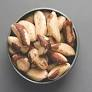
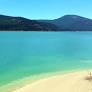
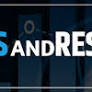
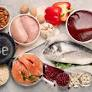
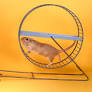
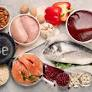

In [13]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import TimeoutException
import time


driver = webdriver.Safari()
# Go to www.google.com
driver.get("https://www.google.com")

try:
    # Wait as long as required, or maximum of 5 sec for element to appear
    # If successful, retrieves the element
    element = WebDriverWait(driver,5).until(
         EC.presence_of_element_located((By.NAME, "q"))) #<q> defines a short quotation

    # Type "selenium"
    element.send_keys("selenium")
    
    #Type Enter
    element.send_keys(Keys.ENTER)
    time.sleep(3)
    print(driver.page_source.encode('utf-8'))


except TimeoutException:
    print("Failed to load search bar at www.google.com")
#finally:
#    driver.quit() 



### Ethical use of web scraping

- Linkedin sued anonymous data scrapers:
https://techcrunch.com/2016/08/15/linkedin-sues-scrapers/

### Key principles for web scraping
- **Get written permission**: The best way to avoid legal issues is to get written permission from a website’s owner covering which data you can scrape and to what extent. 

- **Check the terms of use**: These will often include explicit provisions against automated extraction of data. Oftentimes, a site’s API will come with its own terms of use regarding usage, which you should check as well.

- **Public information only**: If a site exposes information publicly, without explicitly requiring acceptance of terms and conditions, moderated scraping is most likely fine. Sites that require you to log in is another story, however.

- **Don’t cause damage**: Be nice when scraping! Don’t hammer websites with lots of requests, overloading their network and blocking them of normal usage. Stay away from protected computers, and do not try to access servers you’re not given access to.

- **Copyright and fair use**: Copyright law seems to provide the strongest means for plaintiffs to argue their case. Check carefully whether your scraping case would fall under fair use, and do not use copyrighted works in commercial projects.